In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
       

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prasar-bharatiya-dataset/extract_correct_music_speech_timings.csv
/kaggle/input/prasar-bharatiya-dataset/master_tonic_501_v2.xlsx
/kaggle/input/prasar-bharatiya-dataset/Selected_501_files.csv
/kaggle/input/prasar-bharatiya-dataset/Selected_501_chunks_chroma_1292/Selected_501_chunks_chroma_1292/17467-1_55.npy
/kaggle/input/prasar-bharatiya-dataset/Selected_501_chunks_chroma_1292/Selected_501_chunks_chroma_1292/12205-1_25.npy
/kaggle/input/prasar-bharatiya-dataset/Selected_501_chunks_chroma_1292/Selected_501_chunks_chroma_1292/17455-1_22.npy
/kaggle/input/prasar-bharatiya-dataset/Selected_501_chunks_chroma_1292/Selected_501_chunks_chroma_1292/11605-1_11.npy
/kaggle/input/prasar-bharatiya-dataset/Selected_501_chunks_chroma_1292/Selected_501_chunks_chroma_1292/10916-1_5.npy
/kaggle/input/prasar-bharatiya-dataset/Selected_501_chunks_chroma_1292/Selected_501_chunks_chroma_1292/11461-1_38.npy
/kaggle/input/prasar-bharatiya-dataset/Selected_501_chunks_chroma_1292/Selected_501_chu

In [2]:
## Installing (if not) and importing compiam to the project
import importlib.util
if importlib.util.find_spec('compiam') is None:
    ## Bear in mind this will only run in a jupyter notebook / Collab session
    %pip install compiam
import compiam

# Import extras and supress warnings to keep the tutorial clean
import os
import numpy as np
from pprint import pprint

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 93.0 MB/s eta 0:00:00:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 14.0 MB/s e

ModuleNotFoundError: No module named 'compiam'

In [ ]:
pprint(compiam.melody.pitch_extraction.list_tools())

In [5]:
%pip install essentia

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Importing and initializing a melodia instance
from compiam.melody.pitch_extraction import Melodia
melodia = Melodia()  

# Running extraction for an example track
melodia_pitch_track = melodia.extract( '/kaggle/input/prasar-bharatiya-dataset/vocal_501_audio_chunks/vocal_501_audio_chunks/10713-1_12.wav')


[   INFO   ] MusicExtractorSVM: no classifier models were configured by default


In [7]:
print(melodia_pitch_track)

[[0.00000000e+00 0.00000000e+00]
 [2.90249433e-03 0.00000000e+00]
 [5.80498866e-03 0.00000000e+00]
 ...
 [2.99943764e+01 6.01066223e+02]
 [2.99972789e+01 6.01066223e+02]
 [3.00001814e+01 5.97604309e+02]]


In [8]:
print(melodia_pitch_track.shape)

(10337, 2)


In [3]:
import random
import re
import librosa
import torch
import torchaudio
import librosa.display
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import models, layers


2024-06-23 06:23:59.456301: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 06:23:59.456422: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 06:23:59.576319: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
import essentia

# there are two operating modes in essentia which (mostly) have the same algorithms
# they are accessible via two submodules:
import essentia.standard as es
import essentia.streaming as est

# let's have a look at what is in there
print(dir(essentia.standard))

[   INFO   ] MusicExtractorSVM: no classifier models were configured by default


['AfterMaxToBeforeMaxEnergyRatio', 'AllPass', 'AudioLoader', 'AudioOnsetsMarker', 'AudioWriter', 'AutoCorrelation', 'BFCC', 'BPF', 'BandPass', 'BandReject', 'BarkBands', 'BeatTrackerDegara', 'BeatTrackerMultiFeature', 'Beatogram', 'BeatsLoudness', 'BinaryOperator', 'BinaryOperatorStream', 'BpmHistogram', 'BpmHistogramDescriptors', 'BpmRubato', 'CartesianToPolar', 'CentralMoments', 'Centroid', 'ChordsDescriptors', 'ChordsDetection', 'ChordsDetectionBeats', 'ChromaCrossSimilarity', 'Chromagram', 'Chromaprinter', 'ClickDetector', 'Clipper', 'ConstantQ', 'CoverSongSimilarity', 'Crest', 'CrossCorrelation', 'CrossSimilarityMatrix', 'CubicSpline', 'DCRemoval', 'DCT', 'Danceability', 'Decrease', 'Derivative', 'DerivativeSFX', 'DiscontinuityDetector', 'Dissonance', 'DistributionShape', 'Duration', 'DynamicComplexity', 'ERBBands', 'EasyLoader', 'EffectiveDuration', 'Energy', 'EnergyBand', 'EnergyBandRatio', 'Entropy', 'Envelope', 'EqloudLoader', 'EqualLoudness', 'Extractor', 'FFT', 'FFTC', 'Fade

**Dataset Creation**

In [4]:
file_data = pd.read_csv('/kaggle/input/prasar-bharatiya-dataset/Selected_501_files.csv')
print(file_data)

    Original File Name processed_raga_names Detected_Raaga1  \
0        12259-1-1.wav               Abhogi          Abhogi   
1         8213-1-1.wav               Abhogi          Abhogi   
2        13278-1-1.wav       Darbari_kanada  Darbari_kanada   
3        12257-1-1.wav        Abhogi_kanada   Abhogi_kanada   
4        13284-1-1.wav               Khamaj          Khamaj   
..                 ...                  ...             ...   
496      12066-1-2.wav                Kamod           KAMOD   
497      11792-1-1.wav          Majh_khamaj     MAJH KHAMAJ   
498       8181-1-1.wav        Mishra_khamaj   MISHRA-KHAMAJ   
499      12384-1-1.wav        Mishra_khamaj   MISHRA-KHAMAJ   
500      11791-1-1.wav        Mishra_tilang   MISHRA-TILANG   

    Final Selected File  Unnamed: 0       0               Archive No.  \
0                   NaN      3601.0  3741.0  IN-AIR-DSA-GT-M00-024541   
1                   NaN       918.0  1058.0  IN-AIR-DSA-GT-M00-022160   
2                   NaN 

In [5]:
def get_files_by_raga(raga_name):
    # Filter rows where 'processed_raga_names' matches the given raga_name
    filtered_files = file_data[file_data['processed_raga_names'] == raga_name]
    
    # Extract 'Original File Name' for the filtered rows
    original_file_names = filtered_files['Original File Name']
    
    return original_file_names

# Example usage:
raga_name = 'Abhogi'  # Replace with any raga name you want to search for
abhogi_file_names = get_files_by_raga(raga_name)

# Display the file names
abhogi_file_names


0      12259-1-1.wav
1       8213-1-1.wav
157    14994-1-1.wav
Name: Original File Name, dtype: object

In [6]:
all_raga = file_data['processed_raga_names'].unique()
print(all_raga)
print(len(all_raga))

['Abhogi' 'Darbari_kanada' 'Abhogi_kanada' 'Khamaj' 'Adana'
 'Devgiri_bilawal' 'Bhairav' 'Bhimpalasi' 'Alhaiya_bilawal'
 'Vrindavani_sarang' 'Kaushiki_kanada' 'Kirwani' 'Devgandhar' 'Swanandi'
 'Bageshri' 'Puriya' 'Tilak_kamod' 'Bhairavi' 'Bageshri_bahar'
 'Suha_malhar' 'Bageshri_kanada' 'Raysa_kanada' 'Bahar' 'Basant'
 'Basant_bahar' 'Jayant_malhar' 'Basant_kedar' 'Sohni' 'Shyam_kalyan'
 'Jaunpuri' 'Gujri_todi' 'Puriya_kalyan' 'Nand' 'Tilak_shyam' 'Chayanat'
 'Charukeshi' 'Bhatiyar' 'Kafi_kanada' 'Bhinna_shadaja' 'Bhopali' 'Bihag'
 'Des' 'Aheer_bhairav' 'Durga' 'Jog_kauns' 'Malgunji' 'Bihagda' 'Bihari'
 'Chandrakauns (Bhairavi_ang)' 'Chandrakauns' 'Shankara'
 'Chandrakauns (Bageshri_ang)' 'Shuddha_kalyan' 'Kafi_malhar'
 'Kans_gandhar' 'Pahadi' 'Mishra_khamaj' 'Malkauns' 'Darbari'
 'Nayaki_kanada' 'Hansdhwani' 'Jog' 'Basant_bhairav' 'Shivmat_bhairav'
 'Rageshree' 'Paraj' 'Gaud_malhar' 'Gaud_sarang' 'Nat_bhairav' 'Gavati'
 'Gorakh_kalyan' 'Jaijaiwanti' 'Hameer' 'Todi (ahiri)' 'Sawani_bi

In [7]:
from collections import Counter

raga_counts = Counter(file_data['processed_raga_names'])

# Print the count of each unique raga
print(raga_counts)

Counter({'Bhairavi': 15, 'Sohni': 15, 'Jog': 14, 'Khamaj': 13, 'Bageshri': 12, 'Bhopali': 12, 'Bihag': 12, 'Shuddha_kalyan': 12, 'Nayaki_kanada': 12, 'Malkauns': 11, 'Maru_bihaag': 11, 'Jog_kauns': 10, 'Yaman': 10, 'Puriya_kalyan': 9, 'Mishra_khamaj': 9, 'Kedar': 9, 'Des': 8, 'Chandrakauns': 8, 'Pahadi': 8, 'Kafi': 8, 'Darbari_kanada': 6, 'Chayanat': 6, 'Shankara': 6, 'Jaijaiwanti': 6, 'Kalavati': 6, 'Mian_malhar': 6, 'Adana': 5, 'Puriya': 5, 'Gorakh_kalyan': 5, 'Madhukauns': 5, 'Mishra_pilu': 5, 'Basant': 4, 'Jaunpuri': 4, 'Nand': 4, 'Aheer_bhairav': 4, 'Bihagda': 4, 'Rageshree': 4, 'Gaud_malhar': 4, 'Kamod': 4, 'Kaushik_dhwani': 4, 'Majh_khamaj': 4, 'Megh': 4, 'Surdasi_malhar': 4, 'Saraswati': 4, 'Abhogi': 3, 'Bageshri_kanada': 3, 'Basant_bahar': 3, 'Basant_kedar': 3, 'Shyam_kalyan': 3, 'Gujri_todi': 3, 'Kafi_kanada': 3, 'Bhinna_shadaja': 3, 'Durga': 3, 'Hansdhwani': 3, 'Gavati': 3, 'Hameer': 3, 'Sawani_bihag': 3, 'Kaunsi_kanada': 3, 'Janasammohini': 3, 'Jhinjhoti': 3, 'Mishra_bhaira

In [8]:
using_raga = [raga for raga, count in raga_counts.items() if count >= 10]

# Print the filtered ragas
print(using_raga)
print(len(using_raga))
num_classes = len(using_raga)

['Khamaj', 'Bageshri', 'Bhairavi', 'Sohni', 'Bhopali', 'Bihag', 'Jog_kauns', 'Shuddha_kalyan', 'Malkauns', 'Nayaki_kanada', 'Jog', 'Yaman', 'Maru_bihaag']
13


In [57]:
using_raga.remove('Bageshri')
using_raga.remove('Jog_kauns')
# using_raga.remove('Bihag')
print(using_raga)

['Khamaj', 'Bhairavi', 'Sohni', 'Bhopali', 'Bihag', 'Shuddha_kalyan', 'Malkauns', 'Nayaki_kanada', 'Jog', 'Yaman', 'Maru_bihaag']


In [58]:
num_classes = len(using_raga)
print(num_classes)

11


In [59]:
raga_files_dict = {}

# Iterate over each unique raga and get the corresponding original file names
for raga in using_raga:
    # Filter rows where 'processed_raga_names' matches the current raga
    raga_files = file_data[file_data['processed_raga_names'] == raga]['Original File Name'].tolist()
    # Store the result in the dictionary
    raga_files_dict[raga] = raga_files

# Display the dictionary
raga_files_dict

{'Khamaj': ['13284-1-1.wav',
  '14387-1-1.wav',
  '13193-1-1.wav',
  '8002-1-1.wav',
  '14977-1-1.wav',
  '12279-1-1.wav',
  '8160-1-1.wav',
  '12269-1-1.wav',
  '11958-1-1.wav',
  '12519-1-1.wav',
  '11522-1-1.wav',
  '12805-1-1.wav',
  '13069-1-1.wav'],
 'Bhairavi': ['14368-1-1.wav',
  '8291-1-1.wav',
  '15760-1-1.wav',
  '12528-1-1.wav',
  '8252-1-1.wav',
  '8201-1-1.wav',
  '11072-1-1.wav',
  '12312-1-1.wav',
  '14372-1-1.wav',
  '13902-1-1.wav',
  '14613-1-1.wav',
  '13742-1-1.wav',
  '15095-1-1.wav',
  '15535-1-1.wav',
  '14666-1-1.wav'],
 'Sohni': ['10824-1-1.wav',
  '13741-1-1.wav',
  '14934-1-1.wav',
  '14968-1-1.wav',
  '14431-1-1.wav',
  '12723-1-1.wav',
  '11217-1-1.wav',
  '10745-1-1.wav',
  '11373-1-1.wav',
  '12126-1-1.wav',
  '8192-1-1.wav',
  '11520-1-1.wav',
  '13700-1-1.wav',
  '12451-1-1.wav',
  '11871-1-1.wav'],
 'Bhopali': ['14498-1-1.wav',
  '10877-1-1.wav',
  '8031-1-1.wav',
  '11948-1-1.wav',
  '12532-1-1.wav',
  '12044-1-1.wav',
  '13001-1-1.wav',
  '13265-1-1

**Splitting parent audio file into test,train and validate datasets**

In [60]:
def split_parent_files(train_ratio,test_ratio,validate_ratio):
    X_train_parent_file, X_test_parent_file, X_validate_parent_file, y_train_parent_file, y_test_parent_file, y_validate_parent_file = [],[],[],[],[],[]
    for raga in raga_files_dict:
        random.shuffle(raga_files_dict[raga])
        l = len(raga_files_dict[raga])
        test_num = round(l*test_ratio) if l*test_ratio>1 else 1
        validate_num = round(l*validate_ratio) if l*validate_ratio>1 else 1
        train_num = l - test_num - validate_num
        for i in range(test_num):
            X_test_parent_file.append(raga_files_dict[raga][i])
            y_test_parent_file.append(raga)
        for i in range(validate_num):
            X_validate_parent_file.append(raga_files_dict[raga][i+test_num])
            y_validate_parent_file.append(raga)
        for i in range(train_num):
            X_train_parent_file.append(raga_files_dict[raga][test_num+validate_num+i])
            y_train_parent_file.append(raga)
    return X_train_parent_file, X_test_parent_file, X_validate_parent_file, y_train_parent_file, y_test_parent_file, y_validate_parent_file
            

In [61]:
X_train_parent_file, X_test_parent_file, X_validate_parent_file, y_train_parent_file, y_test_parent_file, y_validate_parent_file = split_parent_files(0.8,0.10,0.10)

In [62]:
print(X_train_parent_file)

['11522-1-1.wav', '12519-1-1.wav', '14387-1-1.wav', '8160-1-1.wav', '12269-1-1.wav', '13069-1-1.wav', '12805-1-1.wav', '11958-1-1.wav', '13193-1-1.wav', '12279-1-1.wav', '14977-1-1.wav', '13902-1-1.wav', '11072-1-1.wav', '15095-1-1.wav', '15535-1-1.wav', '8201-1-1.wav', '14372-1-1.wav', '8291-1-1.wav', '13742-1-1.wav', '12312-1-1.wav', '8252-1-1.wav', '14368-1-1.wav', '10824-1-1.wav', '8192-1-1.wav', '11373-1-1.wav', '13741-1-1.wav', '14431-1-1.wav', '13700-1-1.wav', '12126-1-1.wav', '11217-1-1.wav', '12451-1-1.wav', '11520-1-1.wav', '14968-1-1.wav', '13001-1-1.wav', '8031-1-1.wav', '14498-1-1.wav', '12532-1-1.wav', '10877-1-1.wav', '11948-1-1.wav', '13872-1-1.wav', '13090-1-1.wav', '12044-1-1.wav', '13265-1-1.wav', '12275-1-1.wav', '8217-1-1.wav', '10742-1-1.wav', '11474-1-1.wav', '14867-1-1.wav', '13893-1-1.wav', '11812-1-1.wav', '17469-1-1.wav', '11357-1-1.wav', '12081-1-1.wav', '14550-1-1.wav', '12117-1-1.wav', '11471-1-1.wav', '14886-1-1.wav', '14993-1-1.wav', '12509-1-1.wav', '12

In [63]:
print(X_test_parent_file)

['13284-1-1.wav', '15760-1-1.wav', '14613-1-1.wav', '12723-1-1.wav', '14934-1-1.wav', '14448-1-1.wav', '14515-1-1.wav', '11684-1-1.wav', '12184-1-1.wav', '12438-1-1.wav', '11553-1-1.wav', '14614-1-1.wav', '10957-1-1.wav']


In [64]:
print(X_validate_parent_file)

['8002-1-1.wav', '12528-1-1.wav', '14666-1-1.wav', '11871-1-1.wav', '10745-1-1.wav', '14046-1-1.wav', '14098-1-1.wav', '12547-1-1.wav', '14370-1-1.wav', '10774-1-1.wav', '12847-1-1.wav', '12109-1-1.wav', '12237-1-1.wav']


In [65]:
print(y_train_parent_file)
print(y_test_parent_file)
print(y_validate_parent_file)

['Khamaj', 'Khamaj', 'Khamaj', 'Khamaj', 'Khamaj', 'Khamaj', 'Khamaj', 'Khamaj', 'Khamaj', 'Khamaj', 'Khamaj', 'Bhairavi', 'Bhairavi', 'Bhairavi', 'Bhairavi', 'Bhairavi', 'Bhairavi', 'Bhairavi', 'Bhairavi', 'Bhairavi', 'Bhairavi', 'Bhairavi', 'Sohni', 'Sohni', 'Sohni', 'Sohni', 'Sohni', 'Sohni', 'Sohni', 'Sohni', 'Sohni', 'Sohni', 'Sohni', 'Bhopali', 'Bhopali', 'Bhopali', 'Bhopali', 'Bhopali', 'Bhopali', 'Bhopali', 'Bhopali', 'Bhopali', 'Bhopali', 'Bihag', 'Bihag', 'Bihag', 'Bihag', 'Bihag', 'Bihag', 'Bihag', 'Bihag', 'Bihag', 'Bihag', 'Shuddha_kalyan', 'Shuddha_kalyan', 'Shuddha_kalyan', 'Shuddha_kalyan', 'Shuddha_kalyan', 'Shuddha_kalyan', 'Shuddha_kalyan', 'Shuddha_kalyan', 'Shuddha_kalyan', 'Shuddha_kalyan', 'Malkauns', 'Malkauns', 'Malkauns', 'Malkauns', 'Malkauns', 'Malkauns', 'Malkauns', 'Malkauns', 'Malkauns', 'Nayaki_kanada', 'Nayaki_kanada', 'Nayaki_kanada', 'Nayaki_kanada', 'Nayaki_kanada', 'Nayaki_kanada', 'Nayaki_kanada', 'Nayaki_kanada', 'Nayaki_kanada', 'Nayaki_kanada', 

In [66]:
print(len(y_train_parent_file))
print(len(y_test_parent_file))
print(len(y_validate_parent_file))
print(len(X_train_parent_file))
print(len(X_test_parent_file))
print(len(X_validate_parent_file))


111
13
13
111
13
13


**Formation of train, test and validate datasets for chunk audio files**

In [67]:
master_tonic_csv = pd.read_excel('/kaggle/input/prasar-bharatiya-dataset/master_tonic_501_v2.xlsx')
master_tonic_csv 

Unnamed: 0      Final Selected File   Audio_Number Tonic  \
0             0                      NaN  12259-1-1.wav    C#   
1             1                      NaN   8213-1-1.wav    C#   
2             2                      NaN  13278-1-1.wav    G#   
3             3                      NaN  12257-1-1.wav    C#   
4             4                      NaN  14406-1-1.wav    C#   
..          ...                      ...            ...   ...   
496         496          YAMAN--2606.wav  12667-1-1.wav    C#   
497         497          YAMAN--2710.wav  12033-1-1.wav    A#   
498         498          YAMAN--3016.wav  10916-1-1.wav     B   
499         499  SHUDHA_KALYAN--1681.wav  14661-1-1.wav    C#   
500         500          YAMAN--3372.wav  12616-1-1.wav    C#   

                         Remarks  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4                   less audible  
..                           ...  
496                          NaN  
497                          NaN  
498                          NaN  
499  2 different singers singing  
500                          NaN  

[501 rows x 5 columns]

In [68]:
import pandas as pd
import numpy as np

# Define the mapping for the musical notes
mapping_notes = {'G': 0, 'G#': 1, 'A': 2, 'A#': 3, 'B': 4, 'C': 5, 'C#': 6, 'D': 7, 'D#': 8, 'E': 9, 'F': 10, 'F#': 11}
# Map the 'Tonic' column
for i in range(len(master_tonic_csv)):
    val = master_tonic_csv.loc[i, 'Tonic']
    if pd.isna(val):
        master_tonic_csv.loc[i, 'Tonic'] = 0
    elif val in mapping_notes:
        master_tonic_csv.loc[i, 'Tonic'] = mapping_notes[val]
    else:
        print(f"Unexpected value '{val}' in 'Tonic' column at index {i}")
        master_tonic_csv.loc[i, 'Tonic'] = -1  

# Save the updated DataFrame back to a CSV file
master_tonic_csv.to_csv('path_to_your_updated_csv_file.csv', index=False)


In [69]:
master_tonic_csv

Unnamed: 0      Final Selected File   Audio_Number Tonic  \
0             0                      NaN  12259-1-1.wav     6   
1             1                      NaN   8213-1-1.wav     6   
2             2                      NaN  13278-1-1.wav     1   
3             3                      NaN  12257-1-1.wav     6   
4             4                      NaN  14406-1-1.wav     6   
..          ...                      ...            ...   ...   
496         496          YAMAN--2606.wav  12667-1-1.wav     6   
497         497          YAMAN--2710.wav  12033-1-1.wav     3   
498         498          YAMAN--3016.wav  10916-1-1.wav     4   
499         499  SHUDHA_KALYAN--1681.wav  14661-1-1.wav     6   
500         500          YAMAN--3372.wav  12616-1-1.wav     6   

                         Remarks  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4                   less audible  
..                           ...  
496                          NaN  
497                          NaN  
498                          NaN  
499  2 different singers singing  
500                          NaN  

[501 rows x 5 columns]

In [70]:
parent_audio_collection = master_tonic_csv['Audio_Number']
print(parent_audio_collection)

0      12259-1-1.wav
1       8213-1-1.wav
2      13278-1-1.wav
3      12257-1-1.wav
4      14406-1-1.wav
           ...      
496    12667-1-1.wav
497    12033-1-1.wav
498    10916-1-1.wav
499    14661-1-1.wav
500    12616-1-1.wav
Name: Audio_Number, Length: 501, dtype: object


In [71]:
chunk_audio_data = pd.read_csv('/kaggle/input/prasar-bharatiya-dataset/extract_correct_music_speech_timings.csv')
chunk_audio_data

Original File Name                                             speech  \
0        12259-1-1.wav                        12259-1_1.wav,12259-1_2.wav   
1         8213-1-1.wav                                       8213-1_1.wav   
2        13278-1-1.wav  13278-1_1.wav,13278-1_2.wav,13278-1_3.wav,1327...   
3        12257-1-1.wav                        12257-1_1.wav,12257-1_2.wav   
4        14406-1-1.wav                        14406-1_1.wav,14406-1_2.wav   
..                 ...                                                ...   
496      12667-1-1.wav                                                NaN   
497      12033-1-1.wav  12033-1_1.wav,12033-1_2.wav,12033-1_3.wav,1203...   
498      10916-1-1.wav  10916-1_1.wav,10916-1_2.wav,10916-1_3.wav,1091...   
499      14661-1-1.wav  14661-1_1.wav,14661-1_2.wav,14661-1_3.wav,1466...   
500      12616-1-1.wav  12616-1_1.wav,12616-1_2.wav,12616-1_3.wav,1261...   

                                                 music  
0    12259-1_4.wav,12259-1_5.wav,12259-1_6.wav,1225...  
1    8213-1_3.wav,8213-1_4.wav,8213-1_5.wav,8213-1_...  
2    13278-1_10.wav,13278-1_11.wav,13278-1_12.wav,1...  
3    12257-1_4.wav,12257-1_5.wav,12257-1_6.wav,1225...  
4    14406-1_4.wav,14406-1_5.wav,14406-1_6.wav,1440...  
..                                                 ...  
496  12667-1_1.wav,12667-1_2.wav,12667-1_3.wav,1266...  
497  12033-1_7.wav,12033-1_8.wav,12033-1_9.wav,1203...  
498  10916-1_8.wav,10916-1_9.wav,10916-1_10.wav,109...  
499  14661-1_8.wav,14661-1_9.wav,14661-1_10.wav,146...  
500  12616-1_9.wav,12616-1_10.wav,12616-1_11.wav,12...  

[501 rows x 3 columns]

In [72]:
tonic = []

# Iterate through each row in the chunk_audio_data DataFrame
for i in range(len(chunk_audio_data)):
    # Get the 'Original File Name' for the current row
    name = chunk_audio_data['Original File Name'][i]
    
    # Find the index of the row in master_tonic_csv where 'Audio_Number' matches 'name'
    row = master_tonic_csv.index[master_tonic_csv['Audio_Number'] == name].tolist()
    
    # Check if a matching row was found
    if row:
        # Extract the tonic value from the matching row and append it to the tonic list
        tonic_value = master_tonic_csv['Tonic'].iloc[row[0]]
        tonic.append(tonic_value)
    else:
        # Append 0 to the tonic list if no matching row is found
        tonic.append(0)

# Print the list of tonic values
print(tonic)


[6, 6, 1, 6, 6, 1, 6, 6, 1, 6, 6, 6, 6, 8, 6, 7, 8, 6, 7, 0, 8, 2, 8, 0, 7, 8, 1, 8, 6, 8, 6, 7, 8, 5, 3, 7, 1, 6, 9, 6, 7, 8, 1, 2, 6, 8, 3, 2, 2, 9, 1, 2, 6, 6, 6, 2, 1, 8, 1, 6, 6, 7, 6, 9, 8, 6, 9, 7, 2, 2, 3, 3, 6, 6, 1, 10, 2, 9, 6, 6, 6, 3, 6, 3, 8, 5, 8, 6, 7, 6, 7, 6, 7, 1, 8, 1, 9, 8, 7, 9, 1, 7, 2, 2, 1, 1, 6, 6, 2, 2, 3, 6, 8, 6, 8, 8, 5, 3, 6, 6, 1, 7, 1, 7, 8, 3, 3, 1, 7, 8, 1, 6, 6, 8, 8, 5, 6, 8, 6, 7, 7, 2, 6, 3, 3, 8, 7, 7, 7, 6, 6, 6, 6, 0, 6, 6, 1, 3, 8, 0, 7, 3, 8, 6, 6, 3, 6, 7, 7, 1, 2, 6, 8, 8, 7, 1, 6, 6, 7, 1, 6, 7, 9, 8, 1, 7, 1, 8, 3, 1, 8, 8, 5, 3, 8, 6, 2, 8, 1, 7, 6, 6, 6, 2, 8, 6, 4, 6, 7, 6, 7, 6, 2, 7, 6, 7, 1, 9, 3, 8, 1, 8, 1, 1, 8, 3, 2, 1, 1, 6, 1, 3, 6, 2, 3, 7, 8, 3, 8, 6, 6, 1, 2, 2, 6, 7, 6, 3, 5, 6, 1, 7, 1, 3, 7, 7, 8, 2, 1, 1, 6, 6, 6, 6, 6, 1, 0, 7, 6, 6, 1, 2, 6, 6, 6, 9, 5, 6, 7, 1, 3, 8, 8, 7, 1, 1, 7, 8, 3, 7, 2, 2, 6, 8, 3, 8, 7, 3, 3, 6, 6, 6, 8, 0, 6, 7, 1, 8, 8, 7, 8, 3, 3, 8, 6, 9, 6, 8, 6, 6, 7, 6, 5, 6, 7, 6, 9, 9, 8, 9, 7, 8, 7,

In [73]:
print(len(tonic))

501


In [74]:
print(len(master_tonic_csv))

501


In [75]:
print(len(chunk_audio_data))

501


In [76]:
chunk_audio_data['Tonic'] = tonic

In [77]:
chunk_audio_data

Original File Name                                             speech  \
0        12259-1-1.wav                        12259-1_1.wav,12259-1_2.wav   
1         8213-1-1.wav                                       8213-1_1.wav   
2        13278-1-1.wav  13278-1_1.wav,13278-1_2.wav,13278-1_3.wav,1327...   
3        12257-1-1.wav                        12257-1_1.wav,12257-1_2.wav   
4        14406-1-1.wav                        14406-1_1.wav,14406-1_2.wav   
..                 ...                                                ...   
496      12667-1-1.wav                                                NaN   
497      12033-1-1.wav  12033-1_1.wav,12033-1_2.wav,12033-1_3.wav,1203...   
498      10916-1-1.wav  10916-1_1.wav,10916-1_2.wav,10916-1_3.wav,1091...   
499      14661-1-1.wav  14661-1_1.wav,14661-1_2.wav,14661-1_3.wav,1466...   
500      12616-1-1.wav  12616-1_1.wav,12616-1_2.wav,12616-1_3.wav,1261...   

                                                 music  Tonic  
0    12259-1_4.wav,12259-1_5.wav,12259-1_6.wav,1225...      6  
1    8213-1_3.wav,8213-1_4.wav,8213-1_5.wav,8213-1_...      6  
2    13278-1_10.wav,13278-1_11.wav,13278-1_12.wav,1...      1  
3    12257-1_4.wav,12257-1_5.wav,12257-1_6.wav,1225...      6  
4    14406-1_4.wav,14406-1_5.wav,14406-1_6.wav,1440...      6  
..                                                 ...    ...  
496  12667-1_1.wav,12667-1_2.wav,12667-1_3.wav,1266...      6  
497  12033-1_7.wav,12033-1_8.wav,12033-1_9.wav,1203...      3  
498  10916-1_8.wav,10916-1_9.wav,10916-1_10.wav,109...      4  
499  14661-1_8.wav,14661-1_9.wav,14661-1_10.wav,146...      6  
500  12616-1_9.wav,12616-1_10.wav,12616-1_11.wav,12...      6  

[501 rows x 4 columns]

In [78]:
# def form_chunk_data(X,y):
#     X_data, y_data = [],[]
#     for i in range(l

def form_chunk_data(X, y):
    X_data, y_data, tonic = [], [], []
    
    for i in range(len(X)):
        # Find rows in chunk_audio_data where Original_file_data matches the current audio file
        matching_row = chunk_audio_data[chunk_audio_data['Original File Name'] == X[i]].index
        
        # Iterate over the matching rows and append each element in the 'music' column to X_data
        for elements in chunk_audio_data['music'][matching_row]:
            for element in elements.split(','):
                X_data.append(element)
                y_data.append(y[i])
                tonic.append(chunk_audio_data['Tonic'].iloc[matching_row].values[0])

    
    return X_data, y_data, tonic


In [79]:
X_test_chunk,y_test_label, tonic_test = form_chunk_data(X_test_parent_file, y_test_parent_file)
X_train_chunk,y_train_label, tonic_train = form_chunk_data(X_train_parent_file, y_train_parent_file)
X_validate_chunk,y_validate_label, tonic_validate = form_chunk_data(X_validate_parent_file, y_validate_parent_file)
print(X_test_chunk)
print(y_test_label)
print(tonic_test)

['13284-1_4.wav', '13284-1_5.wav', '13284-1_6.wav', '13284-1_7.wav', '13284-1_8.wav', '13284-1_9.wav', '13284-1_10.wav', '13284-1_11.wav', '13284-1_12.wav', '13284-1_13.wav', '13284-1_14.wav', '13284-1_15.wav', '13284-1_16.wav', '13284-1_17.wav', '13284-1_18.wav', '13284-1_19.wav', '13284-1_20.wav', '13284-1_21.wav', '13284-1_22.wav', '13284-1_23.wav', '13284-1_24.wav', '15760-1_3.wav', '15760-1_4.wav', '15760-1_5.wav', '15760-1_6.wav', '15760-1_7.wav', '15760-1_8.wav', '15760-1_9.wav', '15760-1_10.wav', '15760-1_11.wav', '14613-1_3.wav', '14613-1_4.wav', '14613-1_5.wav', '14613-1_6.wav', '14613-1_7.wav', '14613-1_8.wav', '14613-1_9.wav', '12723-1_3.wav', '12723-1_4.wav', '12723-1_5.wav', '12723-1_6.wav', '12723-1_7.wav', '12723-1_8.wav', '12723-1_9.wav', '12723-1_10.wav', '12723-1_11.wav', '12723-1_12.wav', '12723-1_13.wav', '12723-1_14.wav', '12723-1_15.wav', '12723-1_16.wav', '12723-1_17.wav', '12723-1_18.wav', '12723-1_19.wav', '12723-1_20.wav', '12723-1_21.wav', '12723-1_22.wav', 

In [80]:
print(len(X_test_chunk))
print(len(y_test_label))
print(len(X_train_chunk))
print(len(tonic_test))
print(len(y_validate_label))

516
516
5055
516
414


In [81]:
abc = np.load('/kaggle/input/prasar-bharatiya-dataset/Selected_501_chunks_chroma_1292/Selected_501_chunks_chroma_1292/10713-1_12.npy')
print(abc.shape)    
print(X_test_chunk[10])

(12, 1292)
13284-1_14.wav


In [82]:
def shift_chromogram(ch, tonic):
    num_rows = ch.shape[0] 
    shift_amount = tonic
    shifted_ch = np.roll(ch, shift_amount, axis=0)
    return shifted_ch

In [83]:
# Example usage:
# Assuming ch is a (12, 1292) matrix and tonic is 5
ch = np.random.rand(12, 1292)  # Example random chromogram

In [84]:
tonic = 2

shifted_ch = shift_chromogram(ch, tonic)

# Print the first few rows to verify the shift
print("Original chromogram:")
print(ch[:, :5])  # Print the first 3 rows and 5 columns
print("\nShifted chromogram:")
print(shifted_ch[:, :5])  # Print the first 3 rows and 5 columns of the shifted matrix

Original chromogram:
[[0.54171734 0.79267335 0.1752372  0.34343111 0.06595813]
 [0.85721483 0.52658438 0.07365244 0.04982531 0.66454471]
 [0.77850268 0.97098431 0.46296504 0.37846715 0.01724531]
 [0.62005992 0.34410881 0.0034535  0.49803399 0.94496127]
 [0.48452759 0.51773958 0.30354637 0.62971275 0.62857346]
 [0.82201475 0.41333312 0.14467746 0.0426534  0.37517283]
 [0.21749543 0.14714498 0.27126928 0.4799047  0.31769194]
 [0.44207984 0.01259767 0.67412457 0.84631852 0.39372973]
 [0.01197126 0.16424227 0.44172111 0.4615449  0.74332404]
 [0.49767129 0.75709451 0.56993963 0.59187823 0.92549762]
 [0.36773515 0.25930958 0.29715812 0.37948994 0.89047967]
 [0.49422023 0.1767704  0.07979239 0.3274695  0.80721265]]

Shifted chromogram:
[[0.36773515 0.25930958 0.29715812 0.37948994 0.89047967]
 [0.49422023 0.1767704  0.07979239 0.3274695  0.80721265]
 [0.54171734 0.79267335 0.1752372  0.34343111 0.06595813]
 [0.85721483 0.52658438 0.07365244 0.04982531 0.66454471]
 [0.77850268 0.97098431 0.462

In [85]:
path = '/kaggle/input/prasar-bharatiya-dataset/Selected_501_chunks_chroma_1292/Selected_501_chunks_chroma_1292/'
def form_chromogram_dataset(X,y,tonic):
    X_ch,y_ch = [],[]
    for i in range(len(X)):
        file_name_wav = X[i]
        file_name_npy = re.sub(r'\.wav$', '.npy', file_name_wav)
        ton = tonic[i]
#         path_ch = path + file_name_npy
        path_ch = os.path.join(path, file_name_npy)
        if os.path.exists(path_ch):
            ch = np.load(path_ch)
            ch_shifted = shift_chromogram(ch,tonic)
            if(ch.shape[1] == 1292):
                y_ch.append(y[i])
                X_ch.append(ch_shifted)
    return X_ch,y_ch

In [86]:
X_test_ch ,X_train_ch, X_validate_ch, y_test_label_clean,y_train_label_clean,y_validate_label_clean = [],[],[],[],[],[]
X_test_ch,y_test_label_clean = form_chromogram_dataset(X_test_chunk,y_test_label,tonic_test)
X_train_ch, y_train_label_clean = form_chromogram_dataset(X_train_chunk,y_train_label,tonic_train)
X_validate_ch,y_validate_label_clean = form_chromogram_dataset(X_validate_chunk,y_validate_label,tonic_validate)

In [87]:
print(len(X_test_ch))
print(len(X_train_ch))
print(len(X_validate_ch))
print(len(y_test_label_clean))
print(len(y_train_label_clean))
print(len(y_validate_label_clean))

513
4984
362
513
4984
362


In the excel sheet there were a total of 230 audio chunks which were mentioned in the excel file's music column and didn't exist
with 6 in validate, 181 in train  and 43 in test

On removing the last chunk of an audio file which 

In [88]:
# print(X_test_ch)
# print(X_train_ch)
# print(X_validate_ch)
# #11510, 11587, 11510

In [89]:
label_encoder = LabelEncoder()

all_labels = y_test_label_clean + y_train_label_clean + y_validate_label_clean
label_encoder.fit(all_labels)

y_test = label_encoder.transform(y_test_label_clean)
y_train = label_encoder.transform(y_train_label_clean)
y_validate = label_encoder.transform(y_validate_label_clean)

print("Encoded y_test_label:", y_test)
print("Encoded y_train_label:", y_train)
print("Encoded y_validate_label:", y_validate)

Encoded y_test_label: [ 4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  5  5  5  5  5  5  5
  5  5  5  5  7  7  7  7  7  

In [90]:
print("Decoded y_test_label:", label_encoder.inverse_transform(y_test))
print("Decoded y_train_label:", label_encoder.inverse_transform(y_train))
print("Decoded y_validate_label:", label_encoder.inverse_transform(y_validate))

Decoded y_test_label: ['Khamaj' 'Khamaj' 'Khamaj' 'Khamaj' 'Khamaj' 'Khamaj' 'Khamaj' 'Khamaj'
 'Khamaj' 'Khamaj' 'Khamaj' 'Khamaj' 'Khamaj' 'Khamaj' 'Khamaj' 'Khamaj'
 'Khamaj' 'Khamaj' 'Khamaj' 'Khamaj' 'Khamaj' 'Bhairavi' 'Bhairavi'
 'Bhairavi' 'Bhairavi' 'Bhairavi' 'Bhairavi' 'Bhairavi' 'Bhairavi'
 'Bhairavi' 'Bhairavi' 'Bhairavi' 'Bhairavi' 'Bhairavi' 'Bhairavi'
 'Bhairavi' 'Bhairavi' 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni'
 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni'
 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni'
 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni'
 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni'
 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni' 'Sohni'
 'Sohni' 'Sohni' 'Bhopali' 'Bhopali' 'Bhopali' 'Bhopali' 'Bhopali'
 'Bhopali' 'Bhopali' 'Bhopali' 'Bhopali' 'Bhopali' 'Bhopali' 'Bhopali'
 'Bhopali' 'Bhopali' 'Bhopali' 'Bhopali' 'Bhopali' 'Bhop

In [91]:
X_test_ch_arr = np.array(X_test_ch)
X_train_ch_arr = np.array(X_train_ch)
X_validate_ch_arr = np.array(X_validate_ch)

In [92]:
print(X_test_ch_arr.shape)
print(X_train_ch_arr.shape)
print(X_validate_ch_arr.shape)

(513, 12, 1292)
(4984, 12, 1292)
(362, 12, 1292)


In [93]:
# def form_chromogram_dataset(X,y):
#     X_ch,y_ch = [],[]
#     for i in range(len(X)):
#         file_name_wav = X[i]
#         file_name_npy = re.sub(r'\.wav$', '.npy', file_name_wav)
# #         path_ch = path + file_name_npy
#         path_ch = os.path.join(path, file_name_npy)
#         if os.path.exists(path_ch):
#             ch = np.load(path_ch)
#             #X_ch.append(ch)
#             if(ch.shape[1] == 1292):
#                 y_ch.append(y[i])
#                 X_ch.append(ch)
#     return X_ch,y_ch

In [94]:
# Load an audio file
audio = es.MonoLoader(filename='/kaggle/input/prasar-bharatiya-dataset/vocal_501_audio_chunks/vocal_501_audio_chunks/10713-1_12.wav')()

# Use the PitchMelodia algorithm to extract the melody
melody_extractor = es.PredominantPitchMelodia()

# Extract the pitch and the corresponding confidence values
pitch, confidence = melody_extractor(audio)

NameError: name 'es' is not defined

In [40]:
print("Pitch:", pitch)
print(pitch.shape)
print("Confidence:", confidence)
print(confidence.shape)

Pitch: [  0.       0.       0.     ... 601.0662 601.0662 597.6043]
(10337,)
Confidence: [0.         0.         0.         ... 0.10697477 0.10697477 0.10697477]
(10337,)


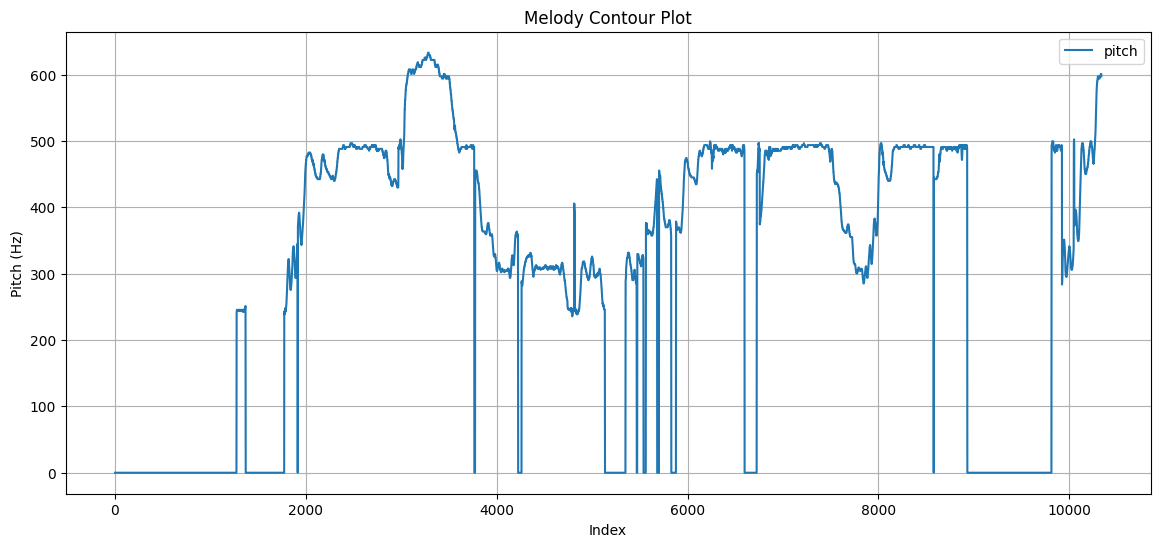

In [41]:
plt.figure(figsize=(14, 6))
plt.plot(pitch, label='pitch')
plt.xlabel('Index')
plt.ylabel('Pitch (Hz)')
plt.title('Melody Contour Plot')
plt.legend()
plt.grid(True)
plt.show()

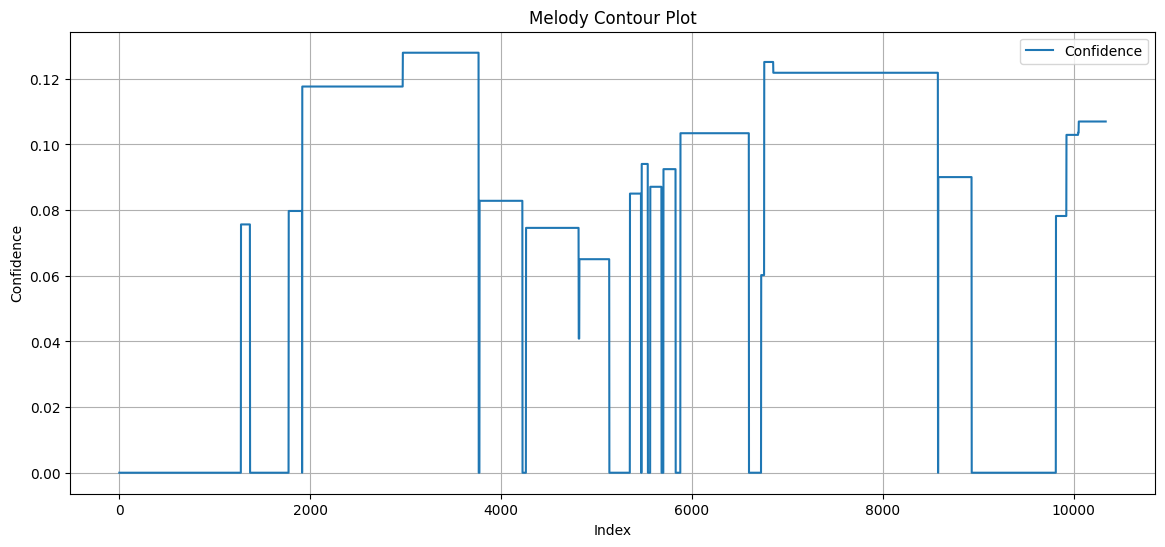

In [42]:
plt.figure(figsize=(14, 6))
plt.plot(confidence, label='Confidence')
plt.xlabel('Index')
plt.ylabel('Confidence')
plt.title('Melody Contour Plot')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
path = '/kaggle/input/prasar-bharatiya-dataset/vocal_501_audio_chunks/vocal_501_audio_chunks/'
p = X_test_chunk[0]
path_wav = os.path.join(path, p)
if os.path.exists(path_wav):
    pitch = melodia.extract(path_wav)
    if(pitch.shape[0] == 10337):
        print(pitch)

[[0.00000000e+00 1.93747940e+02]
 [2.90249433e-03 1.93747940e+02]
 [5.80498866e-03 1.93747940e+02]
 ...
 [2.99943764e+01 2.55652344e+02]
 [2.99972789e+01 2.55652344e+02]
 [3.00001814e+01 2.55652344e+02]]


In [44]:
print(pitch.shape)

(10337, 2)


In [45]:
#path = '/kaggle/input/prasar-bharatiya-dataset/Selected_501_chunks_chroma_1292/Selected_501_chunks_chroma_1292/'
path = '/kaggle/input/prasar-bharatiya-dataset/vocal_501_audio_chunks/vocal_501_audio_chunks/'
def form_pitch_dataset(X):
    X_pitch = []
    for i in range(len(X)):
        file_name_wav = X[i]
        path_wav = os.path.join(path, file_name_wav)
        if os.path.exists(path_wav):
            pitch = melodia.extract(path_wav)
            if(pitch.shape[0] == 10337):
                X_pitch.append(pitch)
    return X_pitch

In [ ]:
X_test_pitch ,X_train_pitch, X_validate_pitch = [],[],[]
X_test_pitch = form_pitch_dataset(X_test_chunk)
X_train_pitch = form_pitch_dataset(X_train_chunk)
X_validate_pitch = form_pitch_dataset(X_validate_chunk)

In [ ]:
print(X_test_pitch)

In [ ]:
print(len(X_test_pitch))

In [95]:
input_shape_ch = (12,1292,1)

In [96]:
def reshape_output(output_matrix):
    # Reshape the output matrix to the desired shape
    output_reshaped = layers.Reshape((output_matrix.shape[2], -1))(output_matrix)
    return output_reshaped


In [97]:
def create_cnn_lstm_model_1(input_shape, num_classes):
    input_layer = layers.Input(shape=input_shape)
    
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
    x = layers.BatchNormalization()(x)
#     x = layers.Activation('relu')(x)
    x = layers.MaxPool2D(pool_size=(2, 1))(x)
    x = layers.Dropout(0.5)(x)
    
    x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
#    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D(pool_size=(2, 1))(x)
    
    x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
#    x = layers.Activation('relu')(x)
#     x = layers.MaxPool2D(pool_size=(2, 1))(x)

    x = layers.Dropout(0.25)(x)
    x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
#    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(256, (3,3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
#    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(256, (3,3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
#    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(512, (3,3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
#    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
#    x = layers.Activation('relu')(x)
    
    
    print(x.shape)
    #x = layers.Flatten()(x)
    x = reshape_output(x)
    print(x.shape)
#     x=layers.LSTM(64, return_sequences=True)(x)
    x=layers.LSTM(128, return_sequences=True)(x)
    x=layers.LSTM(128, return_sequences=False)(x)
    print(x.shape)
    #x = layers.Dense(128, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)
    
    model = models.Model(inputs=input_layer, outputs=output)
    
    return model

In [98]:
def create_cnn_lstm_model_1(input_shape, num_classes):
    input_layer = layers.Input(shape=input_shape)
    
    x = layers.Conv2D(64, (5, 5), activation='relu', padding='same')(input_layer)
    x = layers.BatchNormalization()(x)
#     x = layers.Activation('relu')(x)
#     x = layers.MaxPool2D(pool_size=(2, 1))(x)
    #x = layers.Dropout(0.25)(x)
    
    x = layers.Conv2D(64, (5,5), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
#    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D(pool_size=(2, 1))(x)
    
    x = layers.Conv2D(128, (5,5), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
#    x = layers.Activation('relu')(x)
#     x = layers.MaxPool2D(pool_size=(2, 1))(x)

    x = layers.Dropout(0.25)(x)
    x = layers.Conv2D(128, (5,5), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D(pool_size=(2, 1))(x)
#    x = layers.Activation('relu')(x)

    #x = layers.Dropout(0.3)(x)    
    x = layers.Conv2D(256, (5,5), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, (5,5), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D(pool_size=(2, 1))(x)
    
    #x = layers.Dropout(0.3)(x)    

    
#     x = layers.Dropout(0.3)(x)    
#     x = layers.Conv2D(512, (5,5), activation='relu', padding='same')(x)
#     x = layers.BatchNormalization()(x)
#    x = layers.Activation('relu')(x)
    
#     x = layers.Conv2D(256, (5,5), activation='relu', padding='same')(x)
#     x = layers.BatchNormalization()(x)
#       x = layers.Dropout(0.3)(x)
#     x = layers.MaxPool2D(pool_size=(2, 1))(x)
#    x = layers.Activation('relu')(x)
    
#     x = layers.Conv2D(512, (5,5), activation='relu', padding='same')(x)
#     x = layers.BatchNormalization()(x)
#    x = layers.Activation('relu')(x)
    
#     x = layers.Conv2D(512, (5, 5), activation='relu', padding='same')(x)
#     x = layers.BatchNormalization()(x)
#    x = layers.Activation('relu')(x)
    
    
    print(x.shape)
    #x = layers.Flatten()(x)
    x = reshape_output(x)
    print(x.shape)
#     x=layers.LSTM(64, return_sequences=True)(x)
    x=layers.LSTM(128, return_sequences=True)(x)
    x=layers.LSTM(64, return_sequences=True)(x)
    x=layers.LSTM(64, return_sequences=False)(x)
    print(x.shape)
    #x = layers.Dense(128, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)
    
    model = models.Model(inputs=input_layer, outputs=output)
    
    return model

In [123]:
f, t, num, num_classes= 12,1292,1,11

In [125]:
import tensorflow as tf
 
def make_model(f, t, num, num_classes):
    inputs = tf.keras.layers.Input(shape=(f,t,num))
    x = tf.keras.layers.Conv2D(64, 5, activation='relu', padding = 'same')(inputs)
    #x = PeriodicPadding2D(padding=(2 ,2))(inputs)
    #x = tf.keras.layers.Conv2D(32, 5, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(64, 5, activation='relu', padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 1))(x)
    x = tf.keras.layers.Conv2D(128, 5, activation='relu', padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    #x = PeriodicPadding2D(padding=(2 ,2))(x)
    x = tf.keras.layers.Conv2D(128, 5, activation='relu', padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 1))(x)
    #x = tf.keras.layers.Dropout(0.25)(x)
    #x = PeriodicPadding2D(padding=(2 ,2))(x)
    x = tf.keras.layers.Conv2D(256, 5, activation='relu', padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 1))(x)
    #x = PeriodicPadding2D(padding=(1, 1))(x)
    #x = tf.keras.layers.Conv2D(512, 3, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization()(x)
    #x = tf.keras.layers.MaxPooling2D(pool_size=(1, 2))(x)
 
    x = tf.keras.layers.Reshape((1292, -1))(x)
 
    x = tf.keras.layers.LSTM(128, return_sequences=True)(x)
    x = tf.keras.layers.LSTM(128, return_sequences=True)(x)
    x = tf.keras.layers.LSTM(64)(x)
 
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
 
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model
 
# Replace f, t, num, num_classes with your specific values
model = make_model(f, t, num, num_classes)

In [59]:
cnn_lstm_model_1 = model

# Compile the model
cnn_lstm_model_1.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

NameError: name 'model' is not defined

In [99]:
cnn_lstm_model_1 = create_cnn_lstm_model_1(input_shape_ch, num_classes)
#cnn_lstm_model_1=model
# Compile the model

(None, 1, 1292, 512)
(None, 1292, 512)
(None, 64)


In [100]:
cnn_lstm_model_1.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 12, 1292, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 1292, 64)   │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 1292, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 1292, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 1292, 64)   │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 12, 1292, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 1292, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 1292, 128)   │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 6, 1292, 128)   │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 6, 1292, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 6, 1292, 128)   │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 6, 1292, 128)   │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 1292, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 3, 1292, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 3, 1292, 256)   │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 3, 1292, 256)   │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1292, 256)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1, 1292, 256)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 1, 1292, 512)   │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 1, 1292, 512)   │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 1292, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 1292, 128)      │       328,19

 Total params: 5,231,499 (19.96 MB)

 Trainable params: 5,229,195 (19.95 MB)

 Non-trainable params: 2,304 (9.00 KB)

In [101]:
cnn_lstm_model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [102]:
history = cnn_lstm_model_1.fit(X_train_ch_arr, y_train,
                        epochs=60,
                        batch_size=32,
                        validation_data=(X_validate_ch_arr, y_validate))

# Evaluate the model on test set
test_loss, test_acc = cnn_lstm_model_1.evaluate(X_test_ch_arr, y_test)
print('Test accuracy:', test_acc)
print('Tets Loss:', test_loss)

Epoch 1/60


2024-06-23 08:01:34.662702: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_3_1/dropout_4_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


156/156 ━━━━━━━━━━━━━━━━━━━━ 104s 626ms/step - accuracy: 0.1316 - loss: 2.3300 - val_accuracy: 0.0912 - val_loss: 2.5410
Epoch 2/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 89s 568ms/step - accuracy: 0.1866 - loss: 2.2199 - val_accuracy: 0.0608 - val_loss: 2.7817
Epoch 3/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 89s 568ms/step - accuracy: 0.2067 - loss: 2.1739 - val_accuracy: 0.0552 - val_loss: 2.6673
Epoch 4/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 89s 568ms/step - accuracy: 0.2076 - loss: 2.1893 - val_accuracy: 0.0912 - val_loss: 2.5572
Epoch 5/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 89s 568ms/step - accuracy: 0.2256 - loss: 2.1287 - val_accuracy: 0.1050 - val_loss: 2.5629
Epoch 6/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 89s 568ms/step - accuracy: 0.2030 - loss: 2.1746 - val_accuracy: 0.1188 - val_loss: 2.5290
Epoch 7/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 89s 569ms/step - accuracy: 0.2082 - loss: 2.1696 - val_accuracy: 0.0746 - val_loss: 2.4806
Epoch 8/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 89s 568ms/step - accuracy: 0.1999 - loss: 2.1490 - va


KeyboardInterrupt



In [53]:
test_loss, test_acc = cnn_lstm_model_1.evaluate(X_test_ch_arr, y_test)
print('Test accuracy:', test_acc)
print('Tets Loss:', test_loss)

19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 414ms/step - accuracy: 0.0246 - loss: 4.2345
Test accuracy: 0.057660624384880066
Tets Loss: 4.2427849769592285


In [103]:
from sklearn.metrics import classification_report
import numpy as np


# Predict the classes for the test set
y_pred_probs = cnn_lstm_model_1.predict(X_test_ch_arr)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate the classification report
class_names = using_raga  # Assuming using_raga is a list of class names
print(classification_report(y_test, y_pred, target_names=class_names))


17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 246ms/step
                precision    recall  f1-score   support

        Khamaj       0.00      0.00      0.00        16
      Bhairavi       0.14      0.26      0.19        69
         Sohni       0.00      0.00      0.00        96
       Bhopali       0.44      0.13      0.20        55
         Bihag       0.00      0.00      0.00        21
Shuddha_kalyan       0.05      0.55      0.09        11
      Malkauns       1.00      0.03      0.05        71
 Nayaki_kanada       0.00      0.00      0.00        15
           Jog       0.00      0.00      0.00        50
         Yaman       0.00      0.00      0.00        53
   Maru_bihaag       0.08      0.11      0.09        56

      accuracy                           0.08       513
     macro avg       0.16      0.10      0.06       513
  weighted avg       0.21      0.08      0.07       513



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
from sklearn.metrics import classification_report
import numpy as np


# Predict the classes for the test set
y_pred_probs = cnn_lstm_model_1.predict(X_train_ch_arr)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate the classification report
class_names = using_raga  # Assuming using_raga is a list of class names
print(classification_report(y_train, y_pred, target_names=class_names))


156/156 ━━━━━━━━━━━━━━━━━━━━ 30s 195ms/step
                precision    recall  f1-score   support

        Khamaj       0.00      0.00      0.00       171
      Bhairavi       0.31      0.34      0.32       618
         Sohni       0.40      0.79      0.53       553
       Bhopali       0.51      0.16      0.24       604
         Bihag       0.00      0.00      0.00       170
Shuddha_kalyan       0.35      0.20      0.25       487
      Malkauns       0.49      0.47      0.48       528
 Nayaki_kanada       0.52      0.04      0.07       450
           Jog       0.28      0.76      0.41       622
         Yaman       0.44      0.05      0.09       250
   Maru_bihaag       0.22      0.21      0.22       531

      accuracy                           0.34      4984
     macro avg       0.32      0.27      0.24      4984
  weighted avg       0.36      0.34      0.29      4984



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
cnn_lstm_model_1.optimizer.learning_rate.assign(0.0005)

In [106]:
history = cnn_lstm_model_1.fit(X_train_ch_arr, y_train,
                        epochs=50,
                        batch_size=32,
                        validation_data=(X_validate_ch_arr, y_validate))

# Evaluate the model on test set
test_loss, test_acc = cnn_lstm_model_1.evaluate(X_test_ch_arr, y_test)
print('Test accuracy:', test_acc)
print('Tets Loss:', test_loss)

Epoch 1/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 89s 568ms/step - accuracy: 0.3837 - loss: 1.7912 - val_accuracy: 0.0746 - val_loss: 3.2019
Epoch 2/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 89s 569ms/step - accuracy: 0.4207 - loss: 1.6767 - val_accuracy: 0.1215 - val_loss: 3.4540
Epoch 3/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 89s 569ms/step - accuracy: 0.4418 - loss: 1.6273 - val_accuracy: 0.1409 - val_loss: 3.3403
Epoch 4/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 89s 568ms/step - accuracy: 0.4615 - loss: 1.5680 - val_accuracy: 0.1050 - val_loss: 3.6558
Epoch 5/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 89s 569ms/step - accuracy: 0.4714 - loss: 1.5274 - val_accuracy: 0.1243 - val_loss: 3.5166
Epoch 6/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 89s 569ms/step - accuracy: 0.4963 - loss: 1.4663 - val_accuracy: 0.1464 - val_loss: 3.5385
Epoch 7/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 89s 568ms/step - accuracy: 0.4957 - loss: 1.4283 - val_accuracy: 0.1492 - val_loss: 3.6717
Epoch 8/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 89s 569ms/step - accuracy: 0.5002 - loss: 1

In [144]:
test_loss, test_acc = cnn_lstm_model_1.evaluate(X_test_ch_arr, y_test)
print('Test accuracy:', test_acc)
print('Tets Loss:', test_loss)

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.5025 - loss: 2.2291
Test accuracy: 0.5215146541595459
Tets Loss: 1.7830727100372314


In [112]:
from sklearn.metrics import classification_report
import numpy as np


# Predict the classes for the test set
y_pred_probs = cnn_lstm_model_1.predict(X_test_ch_arr)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate the classification report
class_names = using_raga  # Assuming using_raga is a list of class names
print(classification_report(y_test, y_pred, target_names=class_names))


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step
                precision    recall  f1-score   support

        Khamaj       0.00      0.00      0.00        50
      Bageshri       0.00      0.00      0.00        77
         Sohni       0.00      0.00      0.00        46
       Bhopali       0.00      0.00      0.00         6
Shuddha_kalyan       0.58      0.77      0.66        62
      Malkauns       0.52      0.70      0.60        61
 Nayaki_kanada       0.31      0.25      0.28        20
           Jog       0.70      0.25      0.37        64
         Yaman       0.35      0.30      0.32        61
   Maru_bihaag       0.00      0.00      0.00        86

      accuracy                           0.24       533
     macro avg       0.25      0.23      0.22       533
  weighted avg       0.26      0.24      0.24       533



In [146]:
history = cnn_lstm_model_1.fit(X_train_ch_arr, y_train,
                        epochs=15,
                        batch_size=32,
                        validation_data=(X_validate_ch_arr, y_validate))

# Evaluate the model on test set
test_loss, test_acc = cnn_lstm_model_1.evaluate(X_test_ch_arr, y_test)
print('Test accuracy:', test_acc)
print('Tets Loss:', test_loss)

Epoch 1/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 59s 375ms/step - accuracy: 0.7287 - loss: 0.7941 - val_accuracy: 0.3501 - val_loss: 4.0891
Epoch 2/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 59s 374ms/step - accuracy: 0.7344 - loss: 0.7933 - val_accuracy: 0.3614 - val_loss: 3.6563
Epoch 3/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 59s 374ms/step - accuracy: 0.7489 - loss: 0.7169 - val_accuracy: 0.3695 - val_loss: 3.8857
Epoch 4/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 82s 374ms/step - accuracy: 0.7710 - loss: 0.6749 - val_accuracy: 0.3857 - val_loss: 4.2469
Epoch 5/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 59s 374ms/step - accuracy: 0.7785 - loss: 0.6694 - val_accuracy: 0.3663 - val_loss: 3.5579
Epoch 6/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 59s 374ms/step - accuracy: 0.7602 - loss: 0.6813 - val_accuracy: 0.2464 - val_loss: 4.1183
Epoch 7/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 59s 374ms/step - accuracy: 0.7687 - loss: 0.6720 - val_accuracy: 0.3517 - val_loss: 3.9727
Epoch 8/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 59s 374ms/step - accuracy: 0.7237 - loss: 0

In [147]:
y_pred_probs = cnn_lstm_model_1.predict(X_test_ch_arr)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate the classification report
class_names = using_raga  # Assuming using_raga is a list of class names
print(classification_report(y_test, y_pred, target_names=class_names))

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step
                precision    recall  f1-score   support

        Khamaj       0.93      0.80      0.86        65
      Bageshri       0.55      0.50      0.52       107
         Sohni       0.72      0.87      0.79        71
       Bhopali       0.76      0.67      0.71        61
         Bihag       0.00      0.00      0.00        17
Shuddha_kalyan       0.40      0.61      0.49        31
      Malkauns       0.35      0.59      0.44        61
 Nayaki_kanada       0.66      0.85      0.74        34
           Jog       0.75      0.30      0.43        50
         Yaman       0.41      0.31      0.35        39
   Maru_bihaag       0.33      0.33      0.33        45

      accuracy                           0.57       581
     macro avg       0.53      0.53      0.52       581
  weighted avg       0.59      0.57      0.57       581



In [148]:
history = cnn_lstm_model_1.fit(X_train_ch_arr, y_train,
                        epochs=15,
                        batch_size=32,
                        validation_data=(X_validate_ch_arr, y_validate))

# Evaluate the model on test set
test_loss, test_acc = cnn_lstm_model_1.evaluate(X_test_ch_arr, y_test)
print('Test accuracy:', test_acc)
print('Tets Loss:', test_loss)

Epoch 1/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 59s 375ms/step - accuracy: 0.7701 - loss: 0.6902 - val_accuracy: 0.2966 - val_loss: 4.3316
Epoch 2/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 59s 375ms/step - accuracy: 0.7828 - loss: 0.6100 - val_accuracy: 0.3630 - val_loss: 4.7122
Epoch 3/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 59s 375ms/step - accuracy: 0.8009 - loss: 0.5843 - val_accuracy: 0.3290 - val_loss: 4.6285
Epoch 4/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 59s 375ms/step - accuracy: 0.7936 - loss: 0.5989 - val_accuracy: 0.3517 - val_loss: 4.8079
Epoch 5/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 59s 375ms/step - accuracy: 0.8252 - loss: 0.5293 - val_accuracy: 0.3420 - val_loss: 4.8399
Epoch 6/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 59s 375ms/step - accuracy: 0.8191 - loss: 0.5345 - val_accuracy: 0.3323 - val_loss: 5.0321
Epoch 7/15
106/158 ━━━━━━━━━━━━━━━━━━━━ 18s 358ms/step - accuracy: 0.7878 - loss: 0.6009

KeyboardInterrupt: 

In [1]:
y_pred_probs = cnn_lstm_model_1.predict(X_test_ch_arr)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate the classification report
class_names = using_raga  # Assuming using_raga is a list of class names
print(classification_report(y_test, y_pred, target_names=class_names))

NameError: name 'cnn_lstm_model_1' is not defined

In [ ]:
def create_cnn_model_ch(input_shape, num_classes):
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
    model.add(BatchNormalization())
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))  # Add Dropout layer

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))  # Add Dropout layer

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))  # Add Dropout layer

    model.add(layers.Flatten())
    model.add(Dropout(0.5))  # Add Dropout layer
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    return model

In [ ]:
input_shape_ch = (12,1292,1)
cnn_model_ch = create_cnn_model_ch(input_shape_ch, 20)

# Compile the model
cnn_model_ch.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
cnn_model_ch.summary()

In [ ]:
# Train the model
history = cnn_model_ch.fit(X_train_ch_arr, y_train,
                        epochs=10,
                        batch_size=32,
                        validation_data=(X_validate_ch_arr, y_validate))

# Evaluate the model on test set
test_loss, test_acc = cnn_model_ch.evaluate(X_test_ch_arr, y_test)
print('Test accuracy:', test_acc)